## Импортируем все необходимые библиотеки

In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

## Загрузим и проанализируем датасет [**Ирис**](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

In [142]:
# URL для датасета Iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Загружаем датасет с указанного URL
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, header=None, names=column_names)

# Выводим первые несколько строк датасета
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


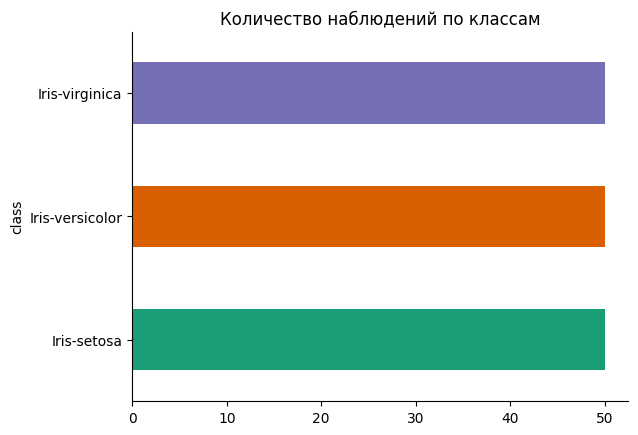

<ipython-input-143-da404efe1a27>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris_df, x='sepal_length', y='class', inner='stick', palette='Dark2')


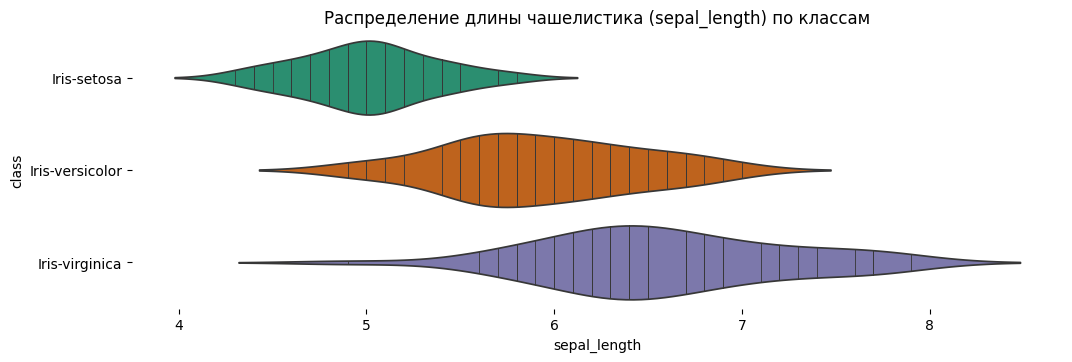

<ipython-input-143-da404efe1a27>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris_df, x='sepal_width', y='class', inner='stick', palette='Dark2')


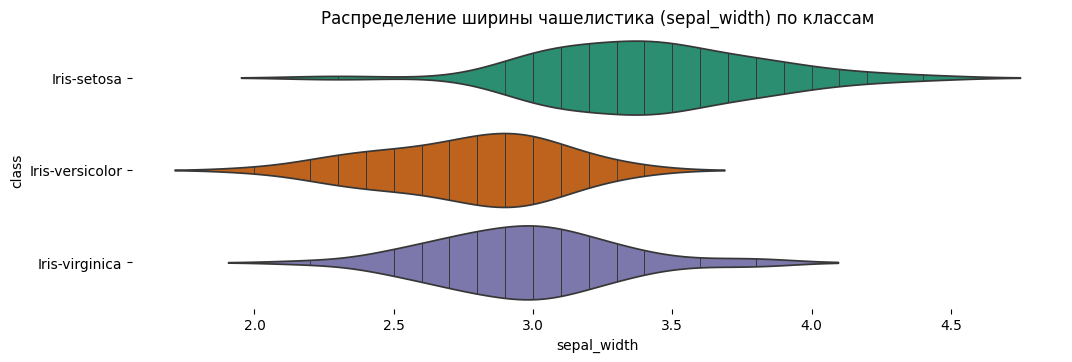

<ipython-input-143-da404efe1a27>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris_df, x='petal_length', y='class', inner='stick', palette='Dark2')


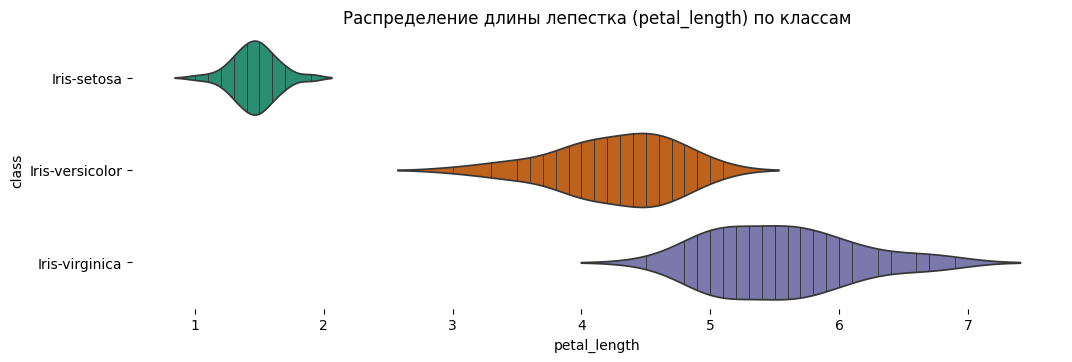

<ipython-input-143-da404efe1a27>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris_df, x='petal_width', y='class', inner='stick', palette='Dark2')


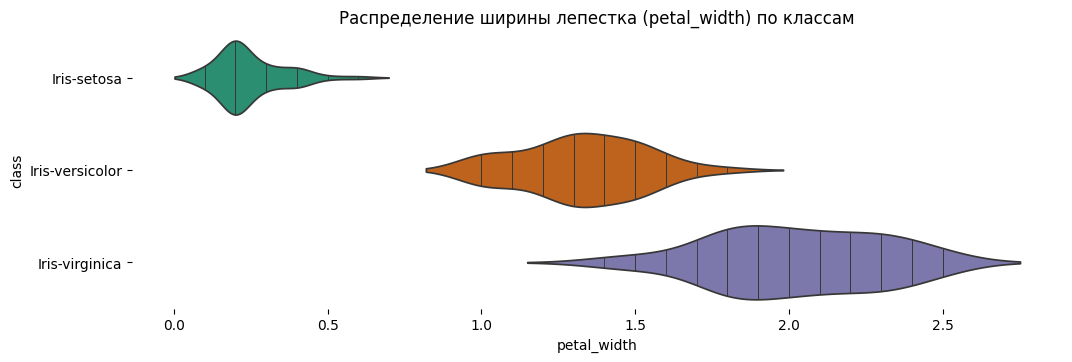

In [143]:
# График горизонтальной гистограммы для распределения классов
iris_df.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Количество наблюдений по классам')
plt.show()

# График распределения sepal_length по классам с использованием violinplot
figsize = (12, 1.2 * len(iris_df['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris_df, x='sepal_length', y='class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Распределение длины чашелистика (sepal_length) по классам')
plt.show()

# График распределения sepal_width по классам с использованием violinplot
plt.figure(figsize=figsize)
sns.violinplot(iris_df, x='sepal_width', y='class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Распределение ширины чашелистика (sepal_width) по классам')
plt.show()

# График распределения petal_length по классам с использованием violinplot
plt.figure(figsize=figsize)
sns.violinplot(iris_df, x='petal_length', y='class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Распределение длины лепестка (petal_length) по классам')
plt.show()

# График распределения petal_width по классам с использованием violinplot
plt.figure(figsize=figsize)
sns.violinplot(iris_df, x='petal_width', y='class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Распределение ширины лепестка (petal_width) по классам')
plt.show()


## Работа с данными

In [144]:
# Преобразуем признаки в матрицу (n, 4)
X = iris_df.iloc[:, :-1].values  # Все столбцы, кроме последнего, для признаков

# Преобразуем названия классов в вектор (n,)
y = iris_df['class'].values  # Только последний столбец для меток классов

# Выводим полученные матрицы
print("Признаки (матрица X):\n", X[:5])  # Печатаем первые 5 строк признаков
print("\nКлассы (вектор y):\n", y[:5])  # Печатаем первые 5 меток классов

Признаки (матрица X):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Классы (вектор y):
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [145]:
# Выводим размеры X, y в памяти
print(f"Размер матрицы X (признаки): {X.nbytes} байт")
print(f"Размер вектора y (классы): {y.nbytes} байт")

Размер матрицы X (признаки): 4800 байт
Размер вектора y (классы): 1200 байт


Рассмотрим веса самих данных в матрице и векторе:

- Таблица признаков занимает 150 объектов * 4 колонок * 8 байт (размер float64) = 4800 байт
- Вектор матрицы занимает 150 объектов * 1 колонку * 8 байт (размер ссылки на объект в массиве) = 1200 байт

In [146]:
print(f"Размер DataFrame (iris_df): {iris_df.memory_usage(deep=True).sum()} байт")

Размер DataFrame (iris_df): 15478 байт


In [147]:
print(iris_df.memory_usage(deep=True))

Index             128
sepal_length     1200
sepal_width      1200
petal_length     1200
petal_width      1200
class           10550
dtype: int64


In [148]:
iris_df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
class,object


Разница в выводах у `вектора y` и `колонки class`:
- **Размер вектора y (1200 байт):** Это результат вызова `y.nbytes`, который просто показывает размер numpy-массива, игнорируя внутренние особенности хранения строк в pandas. Размер может показаться меньшим, потому что numpy просто хранит ссылки на строки, а не сами строки.

- **Размер столбца class в iris_df (10550 байт):** Это результат вызова `iris_df.memory_usage(deep=True)`, который учитывает все объекты и метаданные, связанные с хранением строк. pandas также учитывает дополнительную память, необходимую для хранения строк и их ссылок, что приводит к большему размеру.

## Нормализация данных

Чтобы нормализовать данные, нужно для каждого признака (каждой колонки) вычислить минимальное и максимальное значения, а затем масштабировать данные в диапазон от 0 до 1 с использованием формулы:

$$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Где:
- $ X $ — это исходные данные.
- $ X_{\text{min}} $ — минимальное значение в колонке.
- $ X_{\text{max}} $ — максимальное значение в колонке.

In [149]:
# Нормализация данных вручную
X_norm = np.zeros_like(X, dtype=float)

for i in range(X.shape[1]):
    X_min = X[:, i].min()
    X_max = X[:, i].max()
    X_norm[:, i] = (X[:, i] - X_min) / (X_max - X_min)

# Выводим первые несколько строк нормализованных данных
print("Нормализованные данные (первые 5 строк):\n", X_norm[:5])

Нормализованные данные (первые 5 строк):
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


In [150]:
# Добавляем колонку 'class' к нормализованным данным
iris_df_norm = pd.DataFrame(X_norm, columns=column_names[:-1])  # Признаки без 'class'
iris_df_norm['class'] = y  # Добавляем 'class' в качестве последней колонки

iris_df_norm.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


## Представление одного из признаков в виде категориальной переменной

Представим один из признаков в виде категориальной переменной и разделим его на три типа используя квантили:
    <br>< 0.25 --- small
    <br>0.25 - 0.75 --- medium
    <br>\> 0.75 --- big

In [151]:
# Выберем один из признаков (например, 'sepal_length')
feature = iris_df['sepal_length']

# Вычислим квантили: 25% (Q1) и 75% (Q3)
Q1 = feature.quantile(0.25)
Q3 = feature.quantile(0.75)

# Функция для категоризации признака на 3 типа
def categorize(value):
    if value < Q1:
        return 'small'
    elif value > Q3:
        return 'big'
    else:
        return 'medium'

# Применяем функцию к признаку
iris_df['sepal_length_category'] = iris_df['sepal_length'].apply(categorize)

iris_df[['sepal_length', 'sepal_length_category']].head()

,sepal_length,sepal_length_category
0,5.1,medium
1,4.9,small
2,4.7,small
3,4.6,small
4,5.0,small


## Разделение данных на train и test

Разделим датасет на две случайные выборки (0.8 / 0.2)

In [152]:
# Получаем количество строк в датасете
n = len(iris_df)

indices = np.random.permutation(n)

# Определяем точку разбиения (80% для обучающей выборки)
split_point = int(n * 0.8)


In [153]:
# Создаем обучающую и тестовую выборки
train_df_norm = iris_df_norm.iloc[indices[:split_point]]
test_df_norm = iris_df_norm.iloc[indices[split_point:]]

print(f"Размер всей исходной выборки: {n}")
print(f"Размер обучающей выборки: {len(train_df_norm)}")
print(f"Размер тестовой выборки: {len(test_df_norm)}")

Размер всей исходной выборки: 150
Размер обучающей выборки: 120
Размер тестовой выборки: 30


In [154]:
print("Обучающая выборка (первые 5 строк):")
train_df_norm.head()

Обучающая выборка (первые 5 строк):


,sepal_length,sepal_width,petal_length,petal_width,class
71,0.500000,0.333333,0.508475,0.500000,Iris-versicolor
63,0.500000,0.375000,0.627119,0.541667,Iris-versicolor
41,0.055556,0.125000,0.050847,0.083333,Iris-setosa
50,0.750000,0.500000,0.627119,0.541667,Iris-versicolor
27,0.250000,0.625000,0.084746,0.041667,Iris-setosa


In [155]:
print("Тестовая выборка (первые 5 строк):")
test_df_norm.head()

Тестовая выборка (первые 5 строк):


,sepal_length,sepal_width,petal_length,petal_width,class
18,0.388889,0.750000,0.118644,0.083333,Iris-setosa
35,0.194444,0.500000,0.033898,0.041667,Iris-setosa
133,0.555556,0.333333,0.694915,0.583333,Iris-virginica
70,0.444444,0.500000,0.644068,0.708333,Iris-versicolor
65,0.666667,0.458333,0.576271,0.541667,Iris-versicolor


## Обучение модели SVC (Support Vector Classifier)

  - Выберем один из [методов классификации](https://scikit-learn.org/stable/supervised_learning.html)
  <br>(к примеру, [SVC](https://scikit-learn.org/stable/modules/svm.html)), <br>обучим на тренировочном датасете, оценим результат на тестовом и сделаем выводы


In [156]:
# Разделяем признаки и целевые значения
X_train = train_df_norm.iloc[:, :-2].values
y_train = train_df_norm['class'].values

X_test = test_df_norm.iloc[:, :-2].values
y_test = test_df_norm['class'].values

# Создаем модель SVC
model = SVC()

# Обучаем модель на тренировочном наборе данных
model.fit(X_train, y_train)

SVC()

## Предсказания модели и их оценка

In [157]:
# Прогнозируем результаты на тестовом наборе данных
y_pred = model.predict(X_test)

# Оцениваем точность модели на тестовом наборе
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Вычисляем Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

# Вычисляем Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

# Вычисляем F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9000
Precision: 0.9300
Recall: 0.9000
F1-Score: 0.9028


Результаты модели на тестовом наборе данных показывают, что SVC хорошо справляется с задачей классификации в данном случае, показывая сбалансированную производительность по всем метрикам.

## Экспиремент 1. Попробуем обучить модель без нормализации данных

Датасет Iris — относительно простой для классификации. Даже без нормализации SVM может успешно обучиться, особенно если данные хорошо разделимы в исходном пространстве. Добавим искусственный дисбаланс.

In [158]:
iris_df['sepal_length'] *= 100

In [159]:
# Создаем обучающую и тестовую выборки
train_df = iris_df.iloc[indices[:split_point]]
test_df = iris_df.iloc[indices[split_point:]]

# Выводим размеры выборок
print(f"Размер всей исходной выборки: {n}")
print(f"Размер обучающей выборки: {len(train_df)}")
print(f"Размер тестовой выборки: {len(test_df)}")

Размер всей исходной выборки: 150
Размер обучающей выборки: 120
Размер тестовой выборки: 30


In [160]:
print("Обучающая выборка (первые 5 строк):")
train_df.head()

Обучающая выборка (первые 5 строк):


,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_category
71,610.0,2.8,4.0,1.3,Iris-versicolor,medium
63,610.0,2.9,4.7,1.4,Iris-versicolor,medium
41,450.0,2.3,1.3,0.3,Iris-setosa,small
50,700.0,3.2,4.7,1.4,Iris-versicolor,big
27,520.0,3.5,1.5,0.2,Iris-setosa,medium


In [161]:
print("Тестовая выборка (первые 5 строк):")
test_df.head()

Тестовая выборка (первые 5 строк):


,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_category
18,570.0,3.8,1.7,0.3,Iris-setosa,medium
35,500.0,3.2,1.2,0.2,Iris-setosa,small
133,630.0,2.8,5.1,1.5,Iris-virginica,medium
70,590.0,3.2,4.8,1.8,Iris-versicolor,medium
65,670.0,3.1,4.4,1.4,Iris-versicolor,big


In [162]:
# Разделяем признаки и целевые значения
X_train_without_norm = train_df.iloc[:, :-2].values
y_train_without_norm = train_df['class'].values

X_test_without_norm = test_df.iloc[:, :-2].values
y_test_without_norm = test_df['class'].values

# Создаем модель SVC
model_without_norm = SVC()

# Обучаем модель на тренировочном наборе данных
model_without_norm.fit(X_train_without_norm, y_train_without_norm)

SVC()

In [163]:
# Прогнозируем результаты на тестовом наборе данных
y_pred_without_norm = model_without_norm.predict(X_test_without_norm)

# Оцениваем точность модели на тестовом наборе
accuracy_without_norm = accuracy_score(y_test_without_norm, y_pred_without_norm)
print(f"Accuracy: {accuracy_without_norm:.4f}")

# Вычисляем Precision
precision_without_norm = precision_score(y_test_without_norm, y_pred_without_norm, average='weighted')
print(f"Precision: {precision_without_norm:.4f}")

# Вычисляем Recall
recall_without_norm = recall_score(y_test_without_norm, y_pred_without_norm, average='weighted')
print(f"Recall: {recall_without_norm:.4f}")

# Вычисляем F1-Score
f1_without_norm = f1_score(y_test_without_norm, y_pred_without_norm, average='weighted')
print(f"F1-Score: {f1_without_norm:.4f}")

Accuracy: 0.5333
Precision: 0.6797
Recall: 0.5333
F1-Score: 0.5464


Метрики модели значительно ухудшились из-за ненормализованных данных. Без предварительной нормализации признаков различные масштабные значения могут существенно повлиять на работу модели, особенно для алгоритмов, чувствительных к масштабам, таких как SVC. В случае с ненормализованными данными, признаки с большими значениями могут доминировать в процессе обучения.

## Эксперимент 2: Изменяем параметры SVC

In [164]:
# Базовая модель с линейным ядром
model_base = SVC(kernel='linear')
model_base.fit(X_train, y_train)

# Предсказания
y_pred_base = model_base.predict(X_test)

# Метрики
print("Базовая модель (линейное ядро):")
print(classification_report(y_test, y_pred_base))


Базовая модель (линейное ядро):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.50      0.86      0.63         7
 Iris-virginica       0.89      0.57      0.70        14

       accuracy                           0.77        30
      macro avg       0.80      0.81      0.78        30
   weighted avg       0.83      0.77      0.77        30



Получили accuracy чуть похуже с линейным ядром, чем обучали до этого с rbf ядром.

In [165]:
# Модель с rbf-ядром
model_rbf = SVC(kernel='rbf', C=1.0, gamma=0.1)
model_rbf.fit(X_train, y_train)

# Предсказания
y_pred_rbf = model_rbf.predict(X_test)

# Метрики
print("Модель с RBF-ядром, коэффициентом регуляризации C = 1.0, гамма параметром gamma = 0.1:")
print(classification_report(y_test, y_pred_rbf))


Модель с RBF-ядром, коэффициентом регуляризации C = 1.0, гамма параметром gamma = 0.1:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.39      1.00      0.56         7
 Iris-virginica       1.00      0.21      0.35        14

       accuracy                           0.63        30
      macro avg       0.80      0.74      0.64        30
   weighted avg       0.86      0.63      0.60        30



- При gamma=0.1 модель будет использовать ядро, которое имеет относительно широкое влияние. Это может привести к недообучению, когда модель слишком сильно обобщает данные, не учитывая важные различия между примерами.
- Параметр C контролирует степень наказания за ошибки классификации. Чем выше C, тем сильнее модель будет стремиться минимизировать ошибки на обучающем наборе данных, даже если это приводит к более сложным гиперплоскостям и возможному перебучению. В нашем случае C=1.0 это стандартное значение. При C = 1.0 модель будет стремиться к оптимальному балансу между минимизацией ошибок на обучающем наборе данных и простотой модели (сильно подстраиваться под данные не будет).


In [166]:
# Модель с высокой регуляризацией
model_high_C = SVC(kernel='rbf', C=10.0, gamma=0.1)
model_high_C.fit(X_train, y_train)

# Предсказания
y_pred_high_C = model_high_C.predict(X_test)

# Метрики
print("Модель с высокой регуляризацией (C=10):")
print(classification_report(y_test, y_pred_high_C))


Модель с высокой регуляризацией (C=10):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.55      0.86      0.67         7
 Iris-virginica       0.90      0.64      0.75        14

       accuracy                           0.80        30
      macro avg       0.82      0.83      0.81        30
   weighted avg       0.85      0.80      0.81        30



Получили значение accuracy лучше, чем в предыдущем случае, за счет C=10.0. Так получилось, потому что при большом значении C, модель будет строить более сложные разделяющие гиперплоскости. Вполне возможно, что C=10.0 и gamma=0.1 компенсировали друг друга.

In [167]:
# Модель с низкой регуляризацией
model_low_C = SVC(kernel='rbf', C=0.1, gamma=0.1)
model_low_C.fit(X_train, y_train)

# Предсказания
y_pred_low_C = model_low_C.predict(X_test)

# Метрики
print("Модель с низкой регуляризацией (C=0.1):")
print(classification_report(y_test, y_pred_low_C))


Модель с низкой регуляризацией (C=0.1):
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00         9
Iris-versicolor       0.23      1.00      0.38         7
 Iris-virginica       0.00      0.00      0.00        14

       accuracy                           0.23        30
      macro avg       0.08      0.33      0.13        30
   weighted avg       0.05      0.23      0.09        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ну тут беда

In [168]:
# Модель с полиномиальным ядром
model_poly = SVC(kernel='poly')
model_poly.fit(X_train, y_train)

# Предсказания
y_pred_poly = model_poly.predict(X_test)

# Метрики
print("Модель с полиномиальным ядром:")
print(classification_report(y_test, y_pred_poly))

Модель с полиномиальным ядром:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.97        30
      macro avg       0.98      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



С полиномиальным ядром получили значение accuracy больше, чем в случае с rbf ядром. Модель обучилась достаточно хорошо.

На самом деле конкретно в нашем случае сидеть перебирать все параметры это бессмысленно, я думаю стоит использовать хотя бы RandomSearch или GridSearch

In [174]:
# Параметры для поиска, включая разные типы ядер
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Настройка GridSearchCV для подбора лучших параметров
grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")

# Оценка на тестовой выборке
y_pred = grid_search.predict(X_test)

# Оцениваем точность модели на тестовом наборе
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Вычисляем Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

# Вычисляем Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

# Вычисляем F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

Лучшие параметры: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 0.9667
Precision: 0.9708
Recall: 0.9667
F1-Score: 0.9672


## Эксперимент 3: Очень маленькая выборка

In [170]:
X_train_small, X_test_small = X_train[:10], X_test  # Оставим только 10 примеров для обучения
y_train_small, y_test_small = y_train[:10], y_test

# Обучаем модель SVC с линейным ядром на маленькой выборке
model_small_data = SVC(kernel='linear')
model_small_data.fit(X_train_small, y_train_small)

SVC(kernel='linear')

In [175]:
y_pred_small_data = model_small_data.predict(X_test_small)

# Оцениваем точность модели на тестовом наборе
accuracy_small_data = accuracy_score(y_test_small, y_pred_small_data)
print(f"Accuracy: {accuracy_small_data:.4f}")

# Вычисляем Precision
precision_small_data = precision_score(y_test_small, y_pred_small_data, average='weighted')
print(f"Precision: {precision_small_data:.4f}")

# Вычисляем Recall
recall_small_data = recall_score(y_test_small, y_pred_small_data, average='weighted')
print(f"Recall: {recall_small_data:.4f}")

# Вычисляем F1-Score
f1_small_data = f1_score(y_test_small, y_pred_small_data, average='weighted')
print(f"F1-Score: {f1_small_data:.4f}")

Accuracy: 0.7667
Precision: 0.6111
Recall: 0.7667
F1-Score: 0.6733


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Я считаю, что данные - это один из самых важных моментов при обучении модели. Маленькая выборка может привести к плохим результатам модели, потому что она ограничивает способность модели выявлять и обобщать закономерности, повышает вероятность переобучения, и снижает стабильность метрик. Чем больше выборка, тем больше данных для обучения, тем лучше модель может«увидеть разнообразие примеров и правильно обучиться, улучшая общую производительность. Данные должны быть качественными. Другое дело, где искать вычислительные мощности для обучения на таких данных, но в нашем случае 150 примеров в датасете - это очень не много.

## Визуализируем датасет, пользуясь методами уменьшения размерности.

Уменьшение размерности — это процесс преобразования данных с высоким числом признаков в данные с меньшим числом признаков, при сохранении значимой информации. Это важный этап машинного обучения, который помогает улучшить производительность моделей, ускорить обучение, а также уменьшить вероятность переобучения. Если данные имеют множество признаков, многие из которых избыточны, применение методов уменьшения размерности поможет улучшить результаты модели.

Основные методы уменьшения размерности:
---

### **1. Методы выбора признаков**
Цель — оставить только наиболее значимые признаки, исключая нерелевантные или избыточные.

#### **Методы отбора на основе статистики:**
- **Метод "выбора по порогу важности"**: Исключаются признаки с низкой важностью (например, используя значения из решающих деревьев или моделей бустинга).
- **ANOVA, χ²-тесты**: Применяются для выбора признаков, имеющих значительную корреляцию с целевой переменной.
- **L1-регуляризация (LASSO)**: Добавляет штраф к коэффициентам регрессии, "обнуляя" малозначимые признаки.

#### **Жадные методы отбора признаков:**
- **Forward Selection**: Постепенно добавляются признаки, которые максимально улучшают модель.
- **Backward Elimination**: Удаляются признаки, минимально влияющие на модель.
- **Recursive Feature Elimination (RFE)**: Итеративное исключение наименее важных признаков.

---

### **2. Методы преобразования признаков**
Цель — создать новые признаки (обычно меньшей размерности) из исходных данных.

#### **PCA (Principal Component Analysis, метод главных компонент):**
- Преобразует исходные данные в новые ортогональные признаки (главные компоненты), которые объясняют наибольшую долю дисперсии данных.
- Используется для анализа данных и предварительной обработки в задачах классификации и кластеризации.

#### **SVD (Singular Value Decomposition, сингулярное разложение):**
- Общее разложение матриц, часто используемое для работы с разреженными данными (например, в рекомендательных системах).
- Может быть применено для уменьшения размерности в задачах обработки текстов (Latent Semantic Analysis, LSA).

#### **t-SNE (t-Distributed Stochastic Neighbor Embedding):**
- Нелинейный метод, хорошо подходит для визуализации данных в 2D или 3D. t-SNE используется в первую очередь для визуализации данных, а не для преобразования данных в новом пространстве для использования в последующих шагах машинного обучения.
- Фокусируется на сохранении локальной структуры данных, t-SNE преобразует высокомерное пространство в низкоразмерное так, чтобы похожие точки в высоком пространстве оставались рядом, а непохожие точки находились дальше друг от друга. Он не сохраняет глобальную структуру данных, то есть распределение в целом может быть искажено.

#### **UMAP (Uniform Manifold Approximation and Projection):**
- Современная альтернатива t-SNE, обеспечивающая быструю и качественную визуализацию.
- Хорошо сохраняет как локальную, так и глобальную структуру данных.

#### **Autoencoders (автокодировщики):**
- Нейронные сети, которые обучаются сжатию данных в "узкое место" (bottleneck), затем восстанавливая их.
- Используются для нелинейного уменьшения размерности и извлечения скрытых признаков.

---

### **3. Методы отбора на основе корреляции**
Цель — исключить сильно коррелирующие признаки, чтобы минимизировать избыточность данных.
- Вычисляется корреляционная матрица, и один из признаков в каждой паре с высокой корреляцией удаляется.
- Более сложные варианты используют меры взаимной информации или зависимость функций.

---

### **4. Линейные модели с регуляризацией**
- Регуляризация (например, L1-регуляризация) помогает уменьшить размерность, присваивая некоторым признакам нулевые веса.

In [172]:
def plot_pca(X, y, plt, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}[label] for label in y], cmap='viridis', alpha=0.7)
    legend = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.add_artist(legend)
    plt.set_title(f'PCA - {title}')

def plot_tsne(X, y, plt, title):
    tsne = TSNE(n_components=2, perplexity=min(30, X.shape[0] - 1), random_state=42)
    X_tsne = tsne.fit_transform(X)

    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=[{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}[label] for label in y], cmap='viridis', alpha=0.7)
    legend = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.add_artist(legend)
    plt.set_title(f't-SNE - {title}')

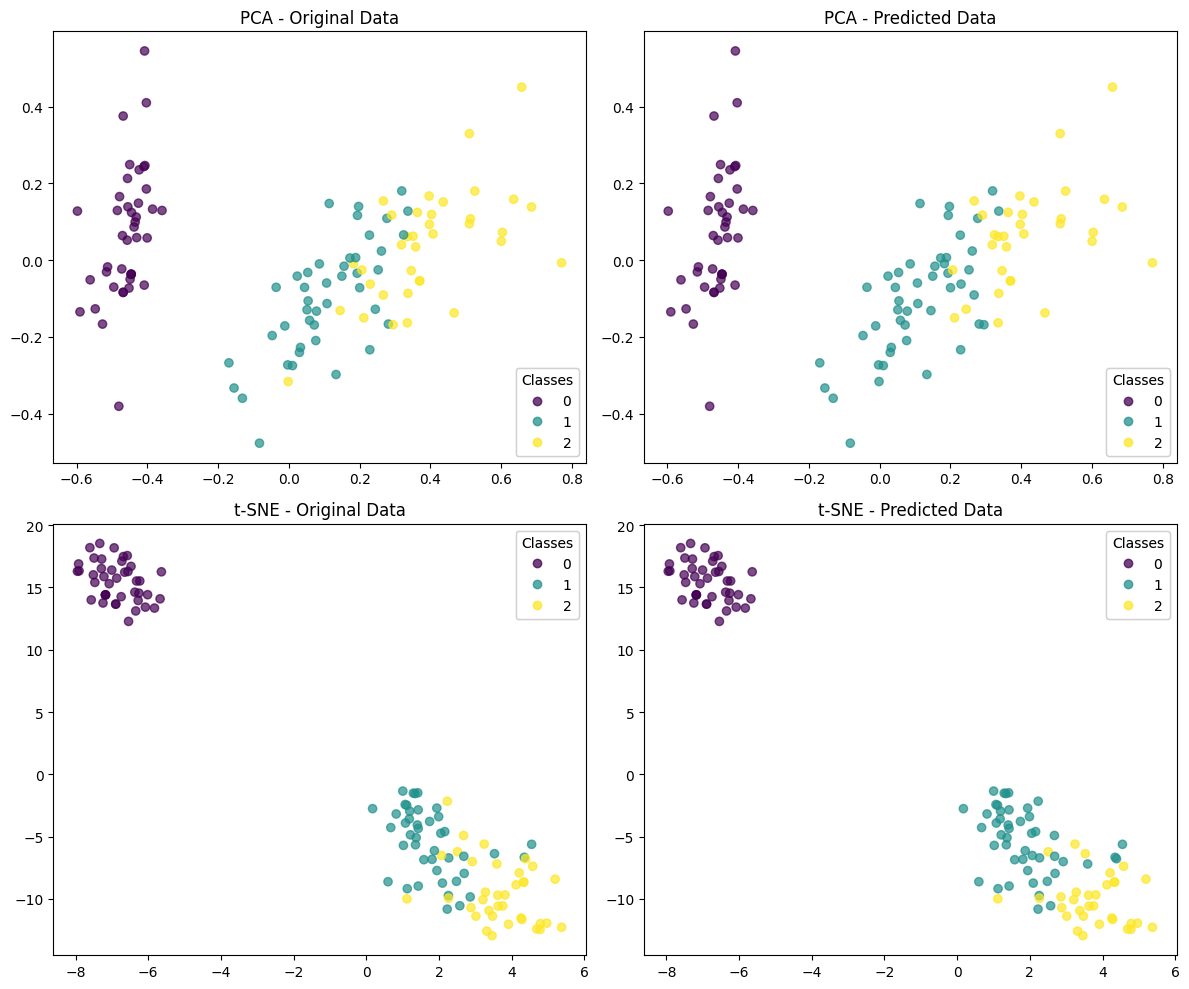

In [173]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Визуализация с использованием PCA и t-SNE для исходных данных
plot_pca(X_train, y_train, axes[0, 0], 'Original Data')
plot_tsne(X_train, y_train, axes[1, 0], 'Original Data')

# Визуализация с использованием PCA и t-SNE для предсказанных данных
plot_pca(X_train, model.predict(X_train), axes[0, 1], 'Predicted Data')
plot_tsne(X_train, model.predict(X_train), axes[1, 1], 'Predicted Data')

plt.tight_layout()
plt.show()